# Classification Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [61]:
RawData = pd.read_csv("train.csv")
X = data.drop(columns = ["diabetes"]).values
y = data['diabetes'].values
data.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112.0,68.0,22.0,94.0,34.1,0.315,26,0
1,25,11,143.0,94.0,33.0,146.0,36.6,0.254,51,1
2,710,2,93.0,64.0,32.0,160.0,38.0,0.674,23,1
3,658,1,120.0,80.0,48.0,200.0,38.9,1.162,41,0
4,542,3,128.0,72.0,25.0,190.0,32.4,0.549,27,1


In [62]:
#Replace zeroes
zero_not_accepted = ['glucose_concentration', 'blood_pressure', 'skin_fold_thickness', 'serum_insulin', 'bmi']

for column in zero_not_accepted: 
    data[column] = data[column].replace(0, np.NaN) #replace all 0 with NaN (doesn't exist)
    mean = int(data[column].mean(skipna=True))
    data[column] = data[column].replace(np.NaN, mean) #replace all NaN with the mean value

# Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier


X = data.iloc[:,0:9].values
y = data.iloc[:,9].values


XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1)

Dt = DecisionTreeClassifier(max_leaf_nodes=9, random_state=1)
Dt.fit(XTrain, yTrain)
yPred = Dt.predict(XTest)

accuracy = Dt.score(XTest, yTest) * 100
print('Accuracy Score:', round(accuracy, 2), '%')


Accuracy Score: 74.03 %


<AxesSubplot:title={'center':'Decision Tree Confusion Matrix'}>

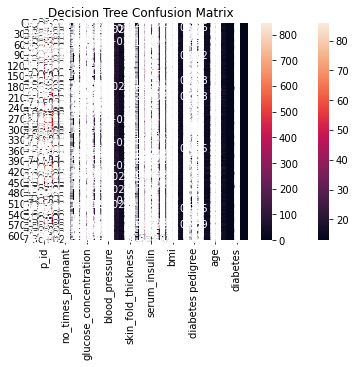

In [64]:
ConfusionM = confusion_matrix(yTest, yPred)
ConfusionM = sns.heatmap(ConfusionM, annot = True)

ConfusionM.set_title('Decision Tree Confusion Matrix')
ConfusionM.set_xlabel('Predicted')
ConfusionM.set_ylabel('Actual')


sns.heatmap(data, annot = True)

# Gaussian Mixture Model Selection

In [50]:
import itertools
from scipy import linalg
import matplotlib as mpl
from sklearn import mixture


XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=0)

GM = mixture.GaussianMixture(n_components = 7, random_state= 1)

GM.fit(XTrain, yTrain)
yPred = GM.predict(XTest)

accuracy = Dt.score(XTest, yTest) * 100
print('Accuracy Score:', round(accuracy, 2), '%')

Accuracy Score: 70.78 %


<AxesSubplot:title={'center':'Decision Tree Confusion Matrix'}>

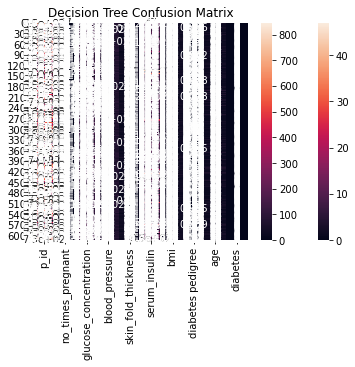

In [51]:
ConfusionM = confusion_matrix(yTest, yPred)
ConfusionM = sns.heatmap(ConfusionM, annot = True)

ConfusionM.set_title('Decision Tree Confusion Matrix')
ConfusionM.set_xlabel('Predicted')
ConfusionM.set_ylabel('Actual')


sns.heatmap(data, annot = True)

In [52]:
from sklearn.neural_network import MLPClassifier

Accuracy Score: 66.23 %


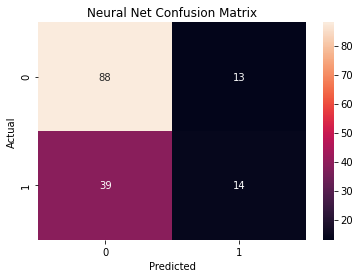

In [37]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=0)

NeuralNet = MLPClassifier(random_state = 3, max_iter = 9000)

NeuralNet.fit(XTrain, yTrain)
yPred = NeuralNet.predict(XTest)

ConfusionM = confusion_matrix(yTest, yPred)
ConfusionM = sns.heatmap(ConfusionM, annot = True)
ConfusionM.set_title('Neural Net Confusion Matrix')
ConfusionM.set_xlabel('Predicted')
ConfusionM.set_ylabel('Actual')

accuracy = (accuracy_score(yTest, yPred)) * 100
print('Accuracy Score:', round(accuracy, 2), '%')